# Machine Learning Project

# Assignment: Perform the following analyses on gum_disease_data.txt 
## The features will be the bacterial species abundances and the classifier will be status. 

## (1) Run a Decision Tree classifier.
## (2) Run a Support Vector Machine analysis.
## The next item is not graded ->
## (3) NOT GRADED (for fun): Tensor flow neural network.

Helpful sites for Decision Tree code:
http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
Plotting the decision trees:
https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn

(Some Random Forest code in case you are interested: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

For Support Vector Machine help see the HA3-checkpoint jupyter notebook or python script.

For Tensor Flow support (using Iris dataset):
https://www.kaggle.com/richbrosius/iris-classification-using-tensorflow


## Data manipulation and plotting libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score

## Decision Tree libraries

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

## SVM Libraries

In [22]:
from sklearn import svm
from sklearn.svm import LinearSVC ,SVC

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## Read in data set

In [11]:
# Load the dataset
df = pd.read_csv('gum_disease_data.txt', sep='\t', index_col=False, low_memory=False)
print(df.head())

# Check the data types
print(df.dtypes)

# Define features and target variable
feature_columns = ['strep', 'prev', 'lepto', 'fuso', 'veil', 'time', 'pocket', 'deepest']
X = df[feature_columns]
y = df['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

     id  strep  prev  lepto  fuso  veil  time  status  pocket  deepest
0  S001   57.4  10.2    0.1   0.0   6.9     1       0     2.7      3.8
1  S001   26.0   0.0   25.6   0.0   6.3     2       0     2.7      3.0
2  S006   19.0  24.2    4.8   5.7   4.2     1       0     2.5      3.2
3  S006   15.2   4.2    0.2   2.6   3.4     2       0     2.4      3.2
4  S007   33.2   2.3    7.4   1.3  12.0     1       0     2.4      2.7
id          object
strep      float64
prev       float64
lepto      float64
fuso       float64
veil       float64
time         int64
status       int64
pocket     float64
deepest    float64
dtype: object


## Training set for all analyses

In [9]:
## FIX THIS EXAMPLE 
#X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4], df['target'],
#                                                   test_size = 0.33, random_state = 100)

## Part 1

## Decision Tree Analysis

In [12]:
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)

## Generate Decision Tree

In [13]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Show gini prediction

In [14]:
y_pred = dt_classifier.predict(X_test)

## Print accuracy

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

Accuracy of the Decision Tree model: 1.00


## Create dot file of Decision Tree

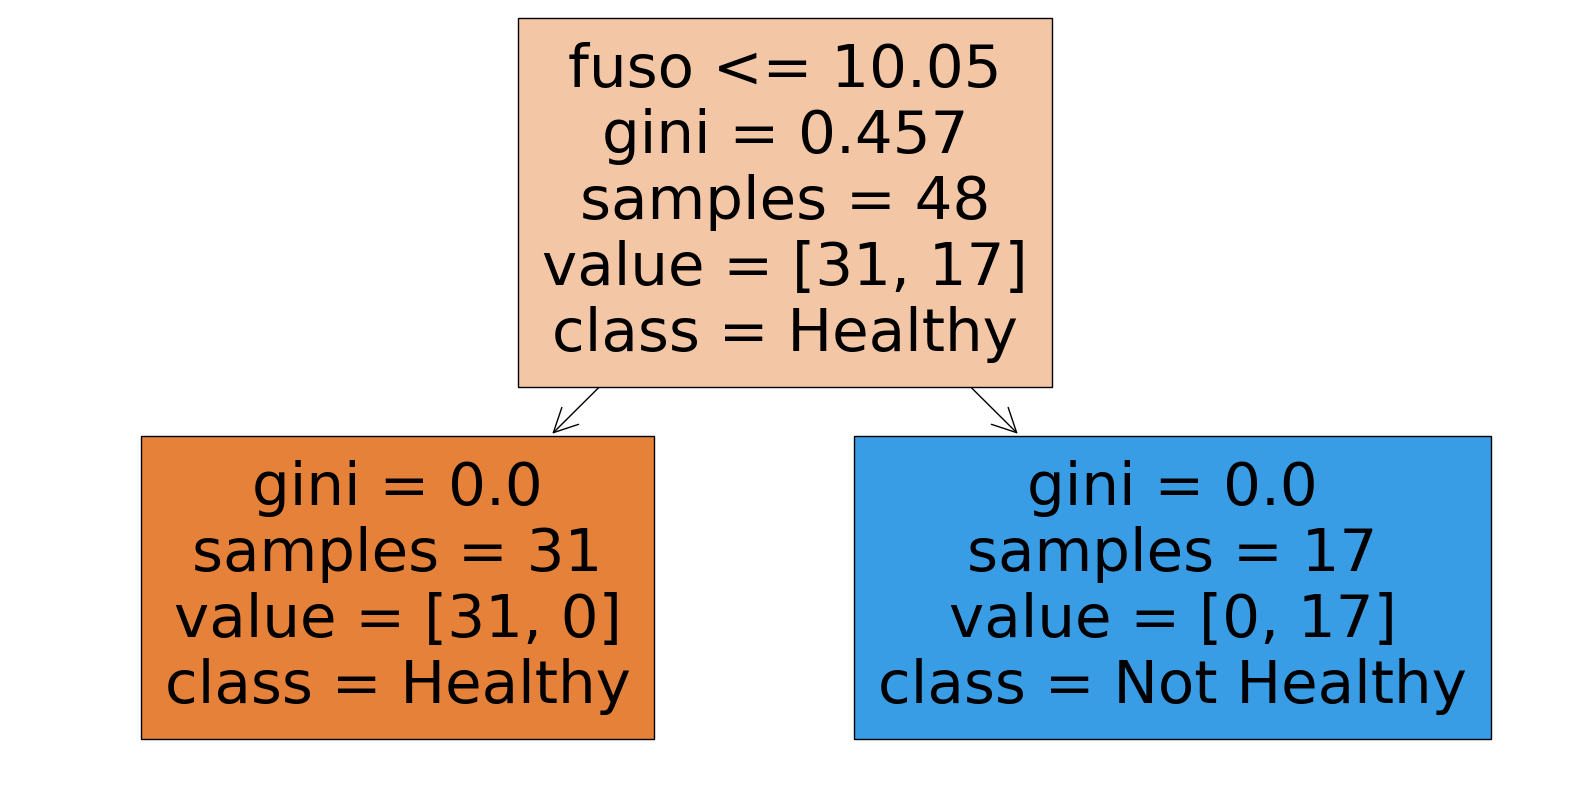

In [16]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns.tolist(), class_names=['Healthy', 'Not Healthy'])
plt.show()

## Part 2

## Support Vector Machine

## Visualize the first 5 rows of the dataset

In [17]:
print(df.head())

     id  strep  prev  lepto  fuso  veil  time  status  pocket  deepest
0  S001   57.4  10.2    0.1   0.0   6.9     1       0     2.7      3.8
1  S001   26.0   0.0   25.6   0.0   6.3     2       0     2.7      3.0
2  S006   19.0  24.2    4.8   5.7   4.2     1       0     2.5      3.2
3  S006   15.2   4.2    0.2   2.6   3.4     2       0     2.4      3.2
4  S007   33.2   2.3    7.4   1.3  12.0     1       0     2.4      2.7


## View pairwise plots of all bacteria features (strep, prev, lepto, fuso, veil) to find best combination of dimensions (clearest separation between class 0 and 1)

C:\Users\darsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\darsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\darsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\darsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

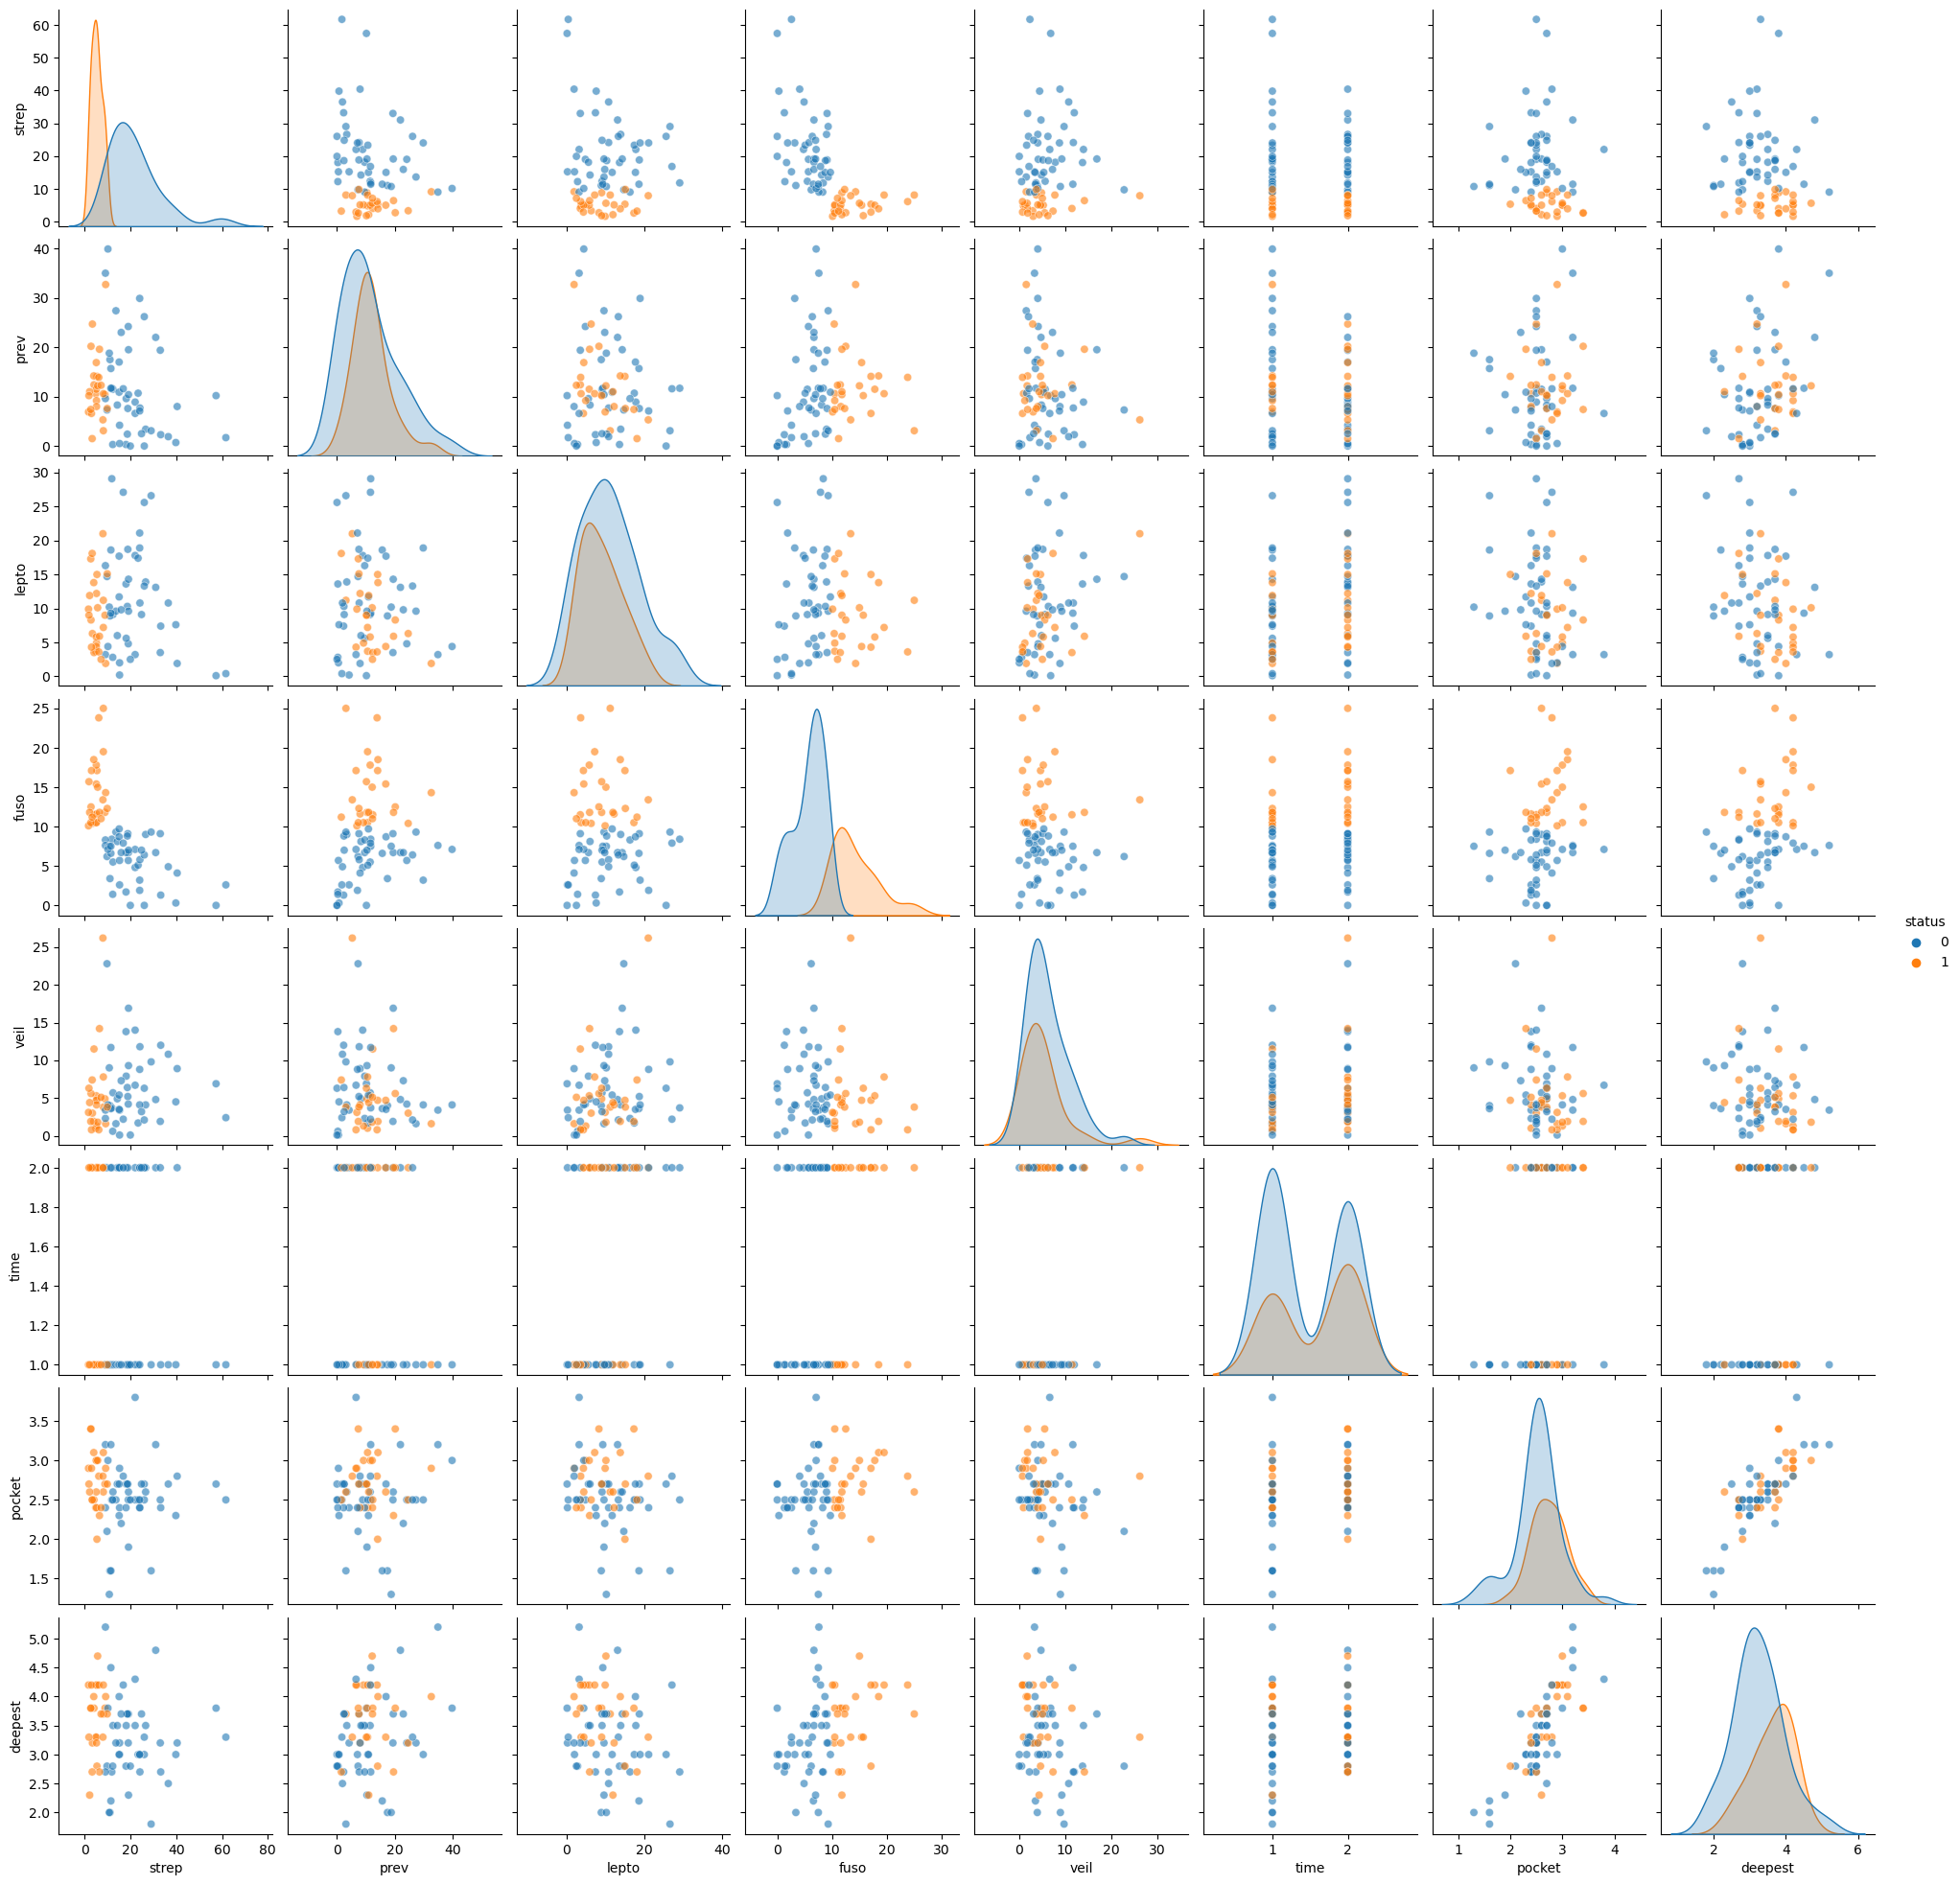

In [24]:
sns.pairplot(df[feature_columns + ['status']], hue='status', plot_kws={'alpha': 0.6})
plt.show()

## Make the training and testing arrays

In [26]:
X = df[feature_columns]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Part A) Non-linear SVM Classifier

## Train the SVM model

In [27]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

## SVM model predictions on the test data

In [28]:
y_pred_svm = svm_classifier.predict(X_test)

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [29]:
cm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for Non-linear SVM:")
print(cm)

Confusion Matrix for Non-linear SVM:
[[15  0]
 [ 1  8]]


## Show Decision Boundary Plot

C:\Users\darsh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


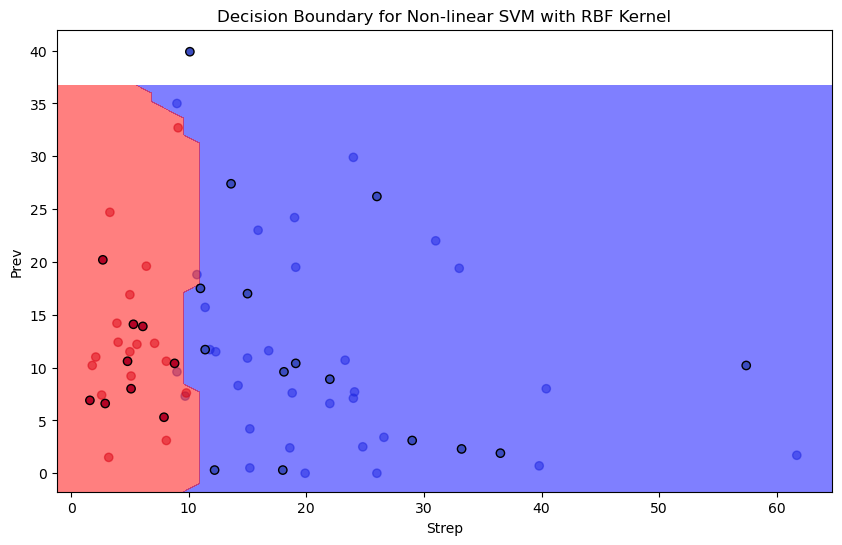

In [31]:

X_train_vis = X_train[['strep', 'prev']]
X_test_vis = X_test[['strep', 'prev']]


svm_vis = SVC(kernel='rbf', random_state=42)
svm_vis.fit(X_train_vis, y_train)


plt.figure(figsize=(10, 6))
plt.scatter(X_train_vis['strep'], X_train_vis['prev'], c=y_train, cmap='coolwarm', alpha=0.5)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


ax.contourf(xx, yy, Z, alpha=0.5, levels=[-1, 0, 1], colors=['blue', 'red'], linestyles=['--', '-', '--'])
ax.scatter(X_test_vis['strep'], X_test_vis['prev'], c=y_test, cmap='coolwarm', edgecolors='k')
plt.xlabel('Strep')
plt.ylabel('Prev')
plt.title('Decision Boundary for Non-linear SVM with RBF Kernel')
plt.show()

# Part B) Linear SVM Classifier

## Train the linear classifier

In [33]:
linear_svm_classifier = SVC(kernel='linear', random_state=42)
linear_svm_classifier.fit(X_train, y_train)
y_pred_linear = linear_svm_classifier.predict(X_test)

## Make the confusion matrix. Categories "Healthy" (status 0) and "Not Healthy" (status 1)

In [34]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix for Linear SVM:")
print(cm_linear)


Confusion Matrix for Linear SVM:
[[15  0]
 [ 0  9]]


## Show Precision and Recall scores

In [35]:
precision = precision_score(y_test, y_pred_linear)
recall = recall_score(y_test, y_pred_linear)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 1.00
Recall: 1.00


## Show Decision Boundary Plot

C:\Users\darsh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


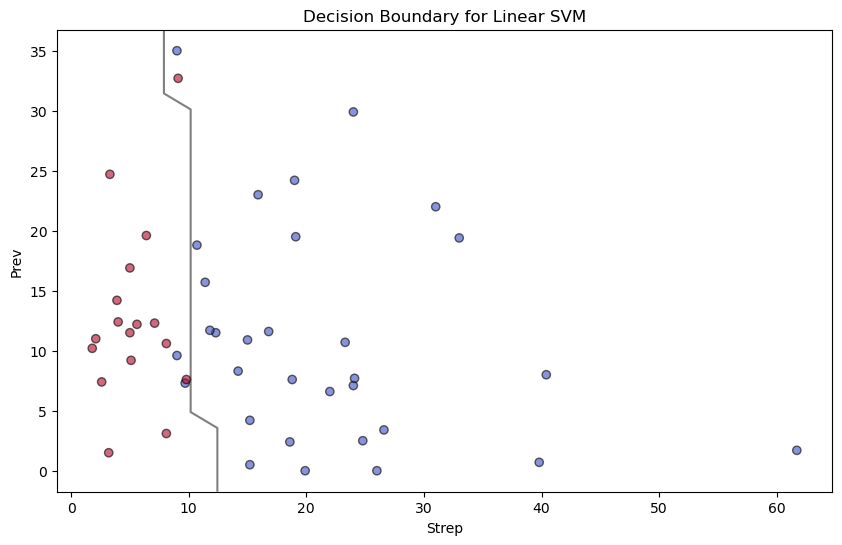

In [37]:

X_train_boundary = X_train[['strep', 'prev']]
X_test_boundary = X_test[['strep', 'prev']]


svm_boundary = SVC(kernel='linear', random_state=42)
svm_boundary.fit(X_train_boundary, y_train)


plt.figure(figsize=(10, 6))
plt.scatter(X_train_boundary['strep'], X_train_boundary['prev'], c=y_train, cmap='coolwarm', alpha=0.6, edgecolor='k')


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))
Z = svm_boundary.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlabel('Strep')
plt.ylabel('Prev')
plt.title('Decision Boundary for Linear SVM')
plt.show()

# Part C) Neural Network extra credit

In [40]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  
    Dense(10, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])


model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/50


C:\Users\darsh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.6126 - loss: 1.1538 - val_accuracy: 0.5000 - val_loss: 0.9243
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5526 - loss: 1.0321 - val_accuracy: 0.6000 - val_loss: 0.5737
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7581 - loss: 0.4604 - val_accuracy: 0.9000 - val_loss: 0.3852
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8340 - loss: 0.5902 - val_accuracy: 0.9000 - val_loss: 0.2755
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8879 - loss: 0.4204 - val_accuracy: 0.9000 - val_loss: 0.2253
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9146 - loss: 0.2912 - val_accuracy: 1.0000 - val_loss: 0.2011
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8807 - loss: 0.3621 - val_accuracy: 1.0000 - val_loss: 0.1904
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9174 - loss: 0.3270 - val_accuracy: 0.9000 - val_loss: 0.1855
Epoch 9/50

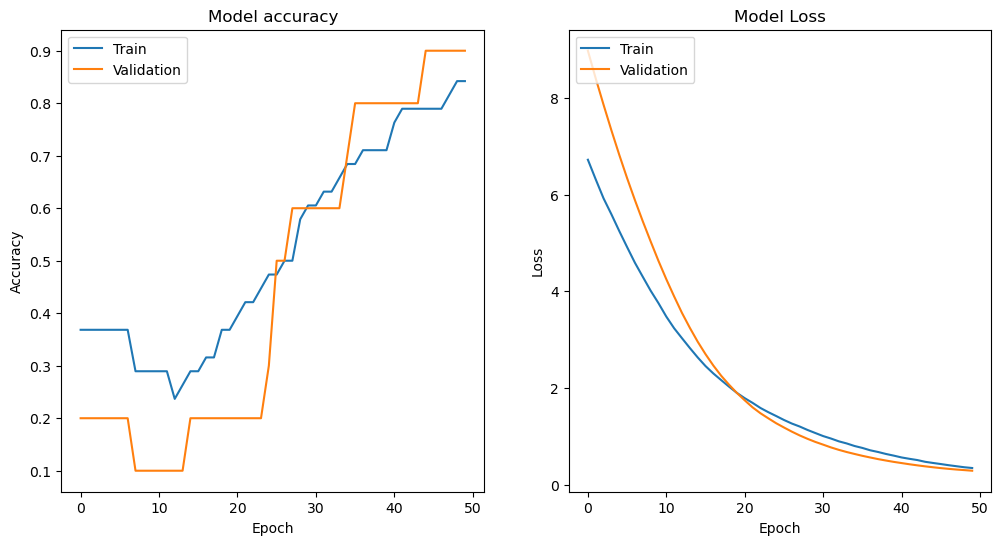

In [39]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()